In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Encoding categorical data

In [6]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Feature Selection

In [8]:
X = df.drop('CustomerID', axis=1)
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Feature Scaling

In [10]:
#Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


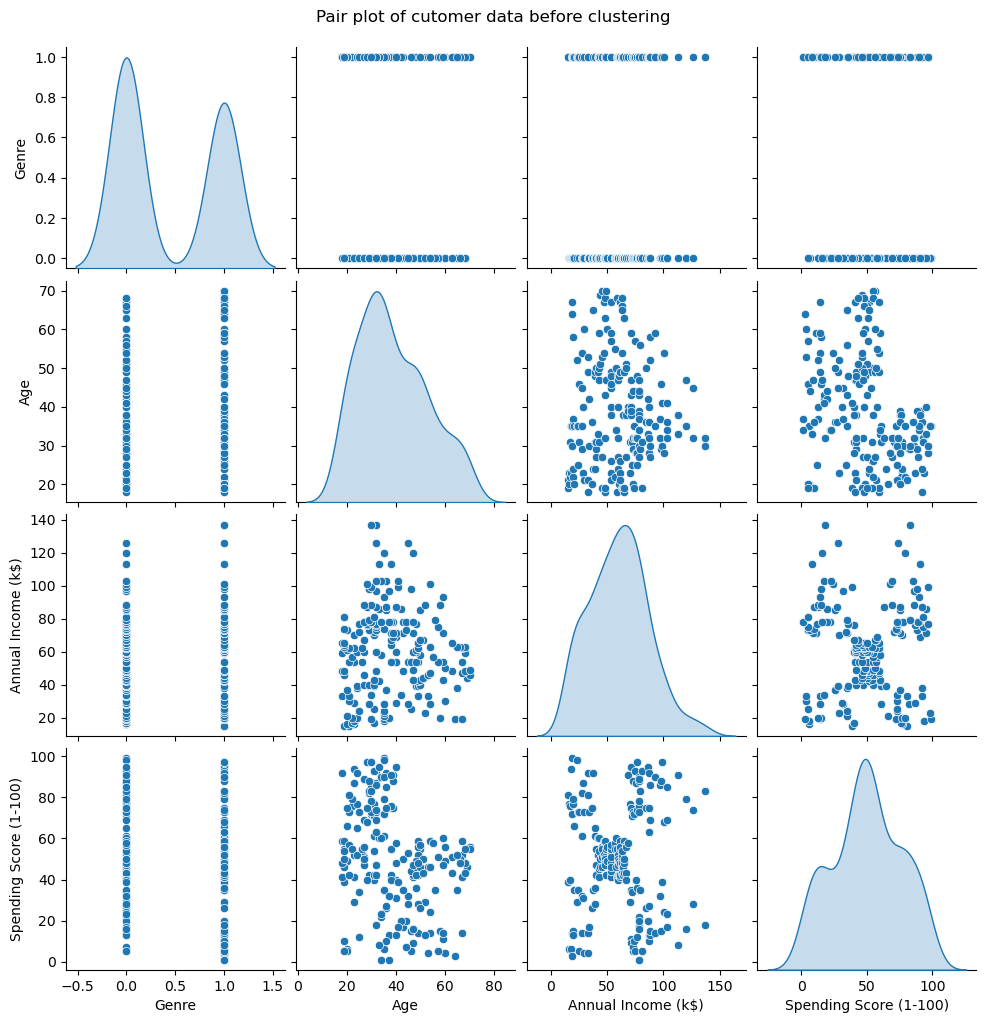

In [23]:
#Plotting pairwise relationships before clustering
sns.pairplot(df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Pair plot of cutomer data before clustering', y=1.02)
plt.show()

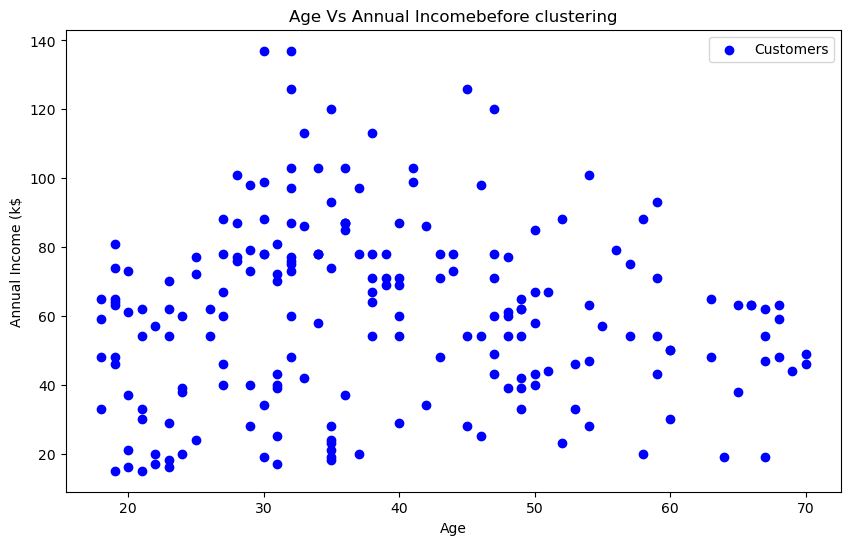

In [25]:
#Scatter plot of Age Vs Annual Income
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c='blue', label='Customers')
plt.title('Age Vs Annual Incomebefore clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$')
plt.legend()
plt.show()

# Determing the optimal clusters using elbow method

C:\Users\atish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\atish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\atish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\atish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

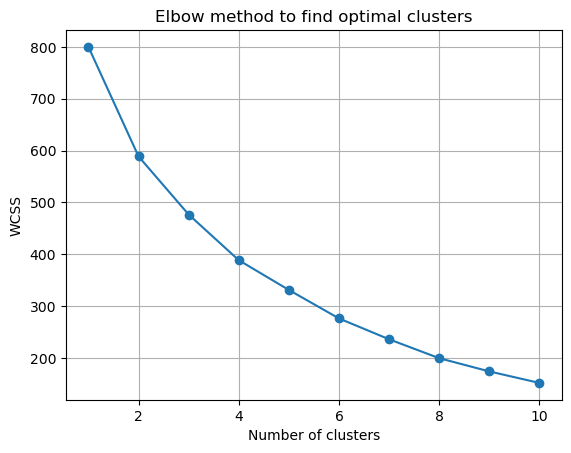

In [27]:
# Calculate within-clusters sum of squares (WCSS) for different cluster counts
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
#Plotting the elbow graph
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method to find optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [29]:
#Applying k-means clustering with 4- clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

#Adding clsuetr label to the orignal data
df['Cluster']=y_kmeans
df.head()

C:\Users\atish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3


# Dimentionaliry reduction using PCA

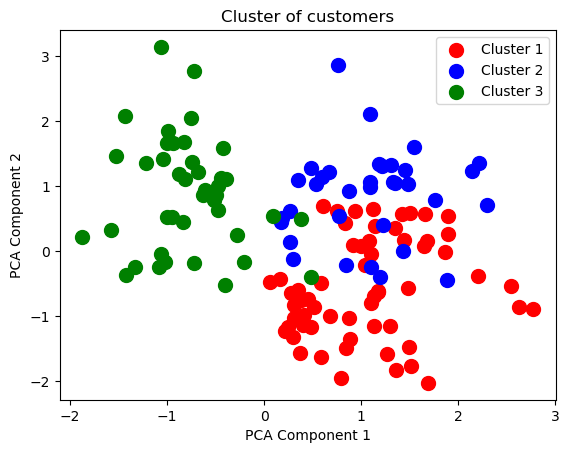

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Visualizing thecluster in 2-D space
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.title('Cluster of customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

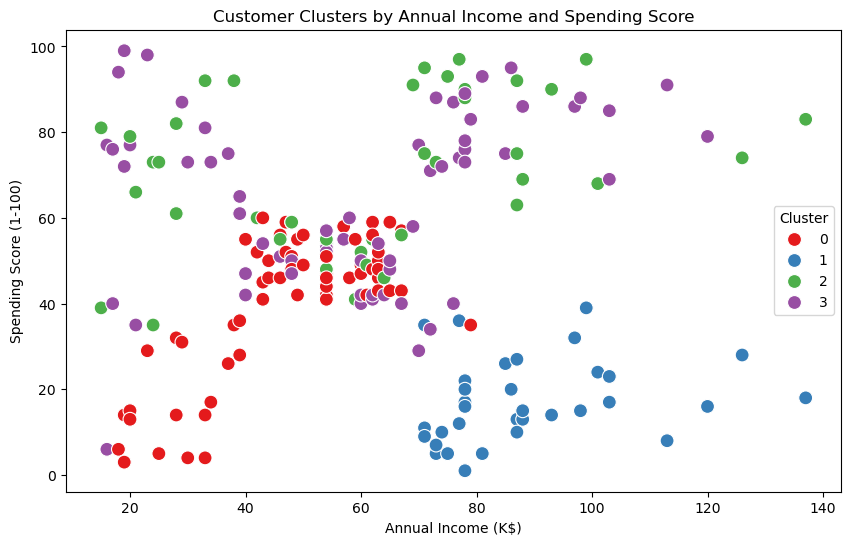

In [33]:
#Visualizing distribution of customers by clusters for 'Age' and 'Annual Income'
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Clusters by Annual Income and Spending Score')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Analyzing cluster centers

          Genre        Age  Annual Income (k$)  Spending Score(1-100)  \
0  4.333333e-01  54.700000           46.900000              39.933333   
1  5.882353e-01  41.264706           88.500000              16.764706   
2  1.000000e+00  28.690476           60.904762              70.238095   
3 -4.440892e-16  29.375000           58.296875              64.437500   

     Cluster  
0  Cluster 1  
1  Cluster 2  
2  Cluster 3  
3  Cluster 4  


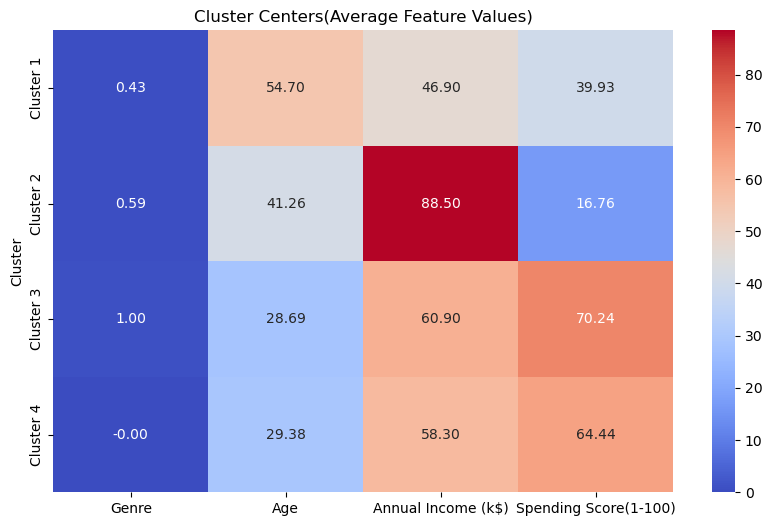

In [44]:
#Visualize the cluster centers in orignal free space
centers_orignal = scaler.inverse_transform(kmeans.cluster_centers_)
#Creating a dataframe to display cluster centers
centers_df = pd.DataFrame(centers_orignal, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score(1-100)'])
centers_df['Cluster'] = [f'Cluster {i+1}' for i in range(len(centers_df))]
#Displaying cluster centers
print(centers_df)
#Plotting the cluster centers
plt.figure(figsize=(10,6))
sns.heatmap(centers_df.set_index('Cluster'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centers(Average Feature Values)')
plt.show()

# Analyzing the results

In [47]:
#Grouping data by clusters and calculate mean values to understand each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         67.783333  0.433333  54.700000           46.900000   
1        164.529412  0.588235  41.264706           88.500000   
2        100.809524  1.000000  28.690476           60.904762   
3         96.953125  0.000000  29.375000           58.296875   

         Spending Score (1-100)  
Cluster                          
0                     39.933333  
1                     16.764706  
2                     70.238095  
3                     64.437500  


# Saving the Results

In [50]:
df.to_csv('segmented_customer.csv', index=False)